# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yudistira Adiyoga
- **Email:** m239b4ky4563@bangkit.academy
- **ID Dicoding:** m239b4ky4563

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan jumlah pengguna sepeda pada hari libur dan hari kerja?
- Berapa perbedaan jumlah penggunaan sepeda pada setiap musim?
- Pada bulan manakah penggunaan sepeda mencapai puncaknya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('submission/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('submission/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day_df : Dataframe contains data aggregated on a daily bike sharing basis
- hour_df : Dataframe contains data aggregated on an hourly bike sharing basis

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Duplication days\t: ", day_df.duplicated().sum())
print("Duplication hours\t: ", hour_df.duplicated().sum())

Duplication days	:  0
Duplication hours	:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- The data frame did not have a null value, duplicate, and outliner. So both data frames did not need cleaning data.

### Cleaning Data

In [11]:
if day_df.duplicated().sum() > 0:
    day_df.drop_duplicates(inplace=True)
if hour_df.duplicated().sum() > 0:
    hour_df.drop_duplicates(inplace=True)

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [13]:
day_df.to_csv('cleaned_day.csv', index=False)
hour_df.to_csv('cleaned_hour.csv', index=False)

**Insight:**
- No need for data cleaning because the dataframe is already clean
- The use of the drop_duplicated() method is only to ensure there are no duplicates

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
day_df.describe(include='all', datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [15]:
hour_df.describe(include='all', datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [16]:
hour_correllation = pd.read_csv('submission/data/hour.csv')
hour_correllation = hour_correllation.drop(["dteday","instant"],axis=True)
hour_correllation.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<AxesSubplot:>

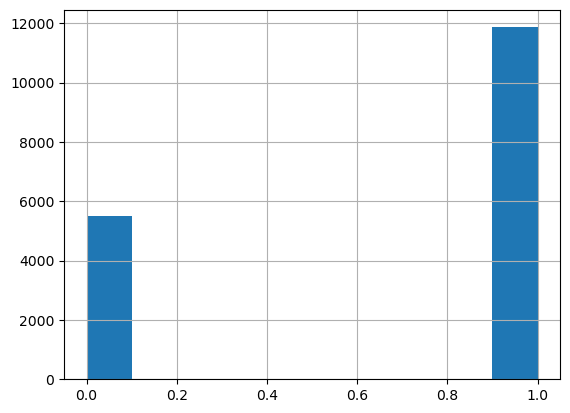

In [17]:
hour_df['workingday'].hist()

<AxesSubplot:>

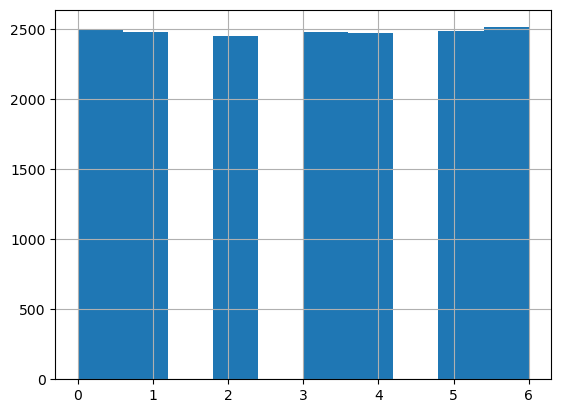

In [18]:
hour_df['weekday'].hist()

<AxesSubplot:>

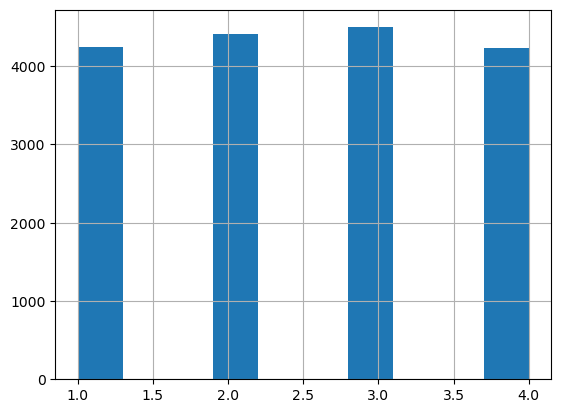

In [19]:
hour_df['season'].hist()

<AxesSubplot:>

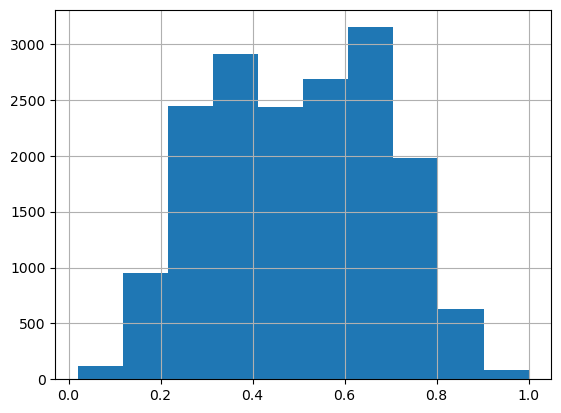

In [20]:
hour_df['temp'].hist()

<AxesSubplot:>

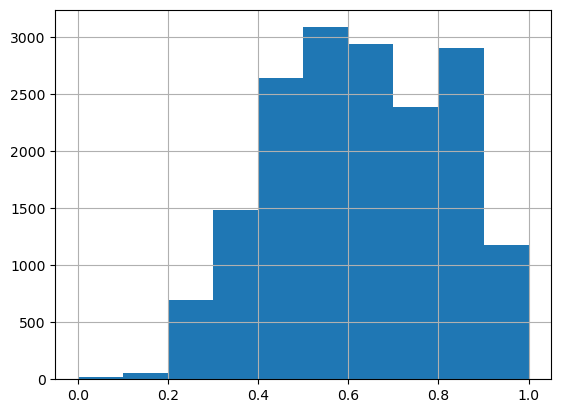

In [21]:
hour_df['hum'].hist()

<AxesSubplot:>

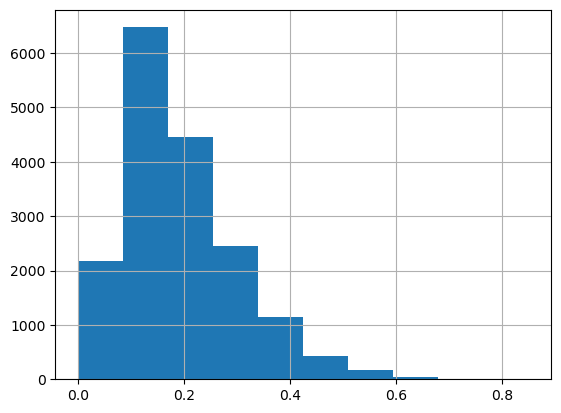

In [22]:
hour_df['windspeed'].hist()

In [23]:
holiday_stats = day_df.groupby('holiday').agg(
    avg_total_rentals=('cnt', 'mean'),
    median_total_rentals=('cnt', 'median'),
    total_rentals=('cnt', 'sum'),
    avg_casual=('casual', 'mean'),
    median_casual=('casual', 'median'),
    total_casual=('casual', 'sum'),
    avg_registered=('registered', 'mean'),
    median_registered=('registered', 'median'),
    total_registered=('registered', 'sum')
).reset_index()

print(holiday_stats)

   holiday  avg_total_rentals  median_total_rentals  total_rentals  \
0        0        4527.104225                4558.0        3214244   
1        1        3735.000000                3351.0          78435   

    avg_casual  median_casual  total_casual  avg_registered  \
0   841.771831          711.5        597658     3685.332394   
1  1064.714286          874.0         22359     2670.285714   

   median_registered  total_registered  
0             3691.0           2616586  
1             2549.0             56076  


In [24]:
season_stats = day_df.groupby('season').agg(
    avg_total_rentals=('cnt', 'mean'),
    median_total_rentals=('cnt', 'median'),
    total_rentals=('cnt', 'sum'),
    avg_casual=('casual', 'mean'),
    median_casual=('casual', 'median'),
    total_casual=('casual', 'sum'),
    avg_registered=('registered', 'mean'),
    median_registered=('registered', 'median'),
    total_registered=('registered', 'sum')
).reset_index()

print(season_stats)

   season  avg_total_rentals  median_total_rentals  total_rentals  \
0       1        2604.132597                2209.0         471348   
1       2        4992.331522                4941.5         918589   
2       3        5644.303191                5353.5        1061129   
3       4        4728.162921                4634.5         841613   

    avg_casual  median_casual  total_casual  avg_registered  \
0   334.928177          218.0         60622     2269.204420   
1  1106.097826          867.0        203522     3886.233696   
2  1202.611702         1050.5        226091     4441.691489   
3   729.112360          544.5        129782     3999.050562   

   median_registered  total_registered  
0             1867.0            410726  
1             3844.0            715067  
2             4110.5            835038  
3             3815.0            711831  


In [25]:
monthly_stats = day_df.groupby('mnth').agg(
    total_rentals=('cnt', 'sum'),
    avg_rentals=('cnt', 'mean')
).reset_index()

print(monthly_stats)

    mnth  total_rentals  avg_rentals
0      1         134933  2176.338710
1      2         151352  2655.298246
2      3         228920  3692.258065
3      4         269094  4484.900000
4      5         331686  5349.774194
5      6         346342  5772.366667
6      7         344948  5563.677419
7      8         351194  5664.419355
8      9         345991  5766.516667
9     10         322352  5199.225806
10    11         254831  4247.183333
11    12         211036  3403.806452


**Insight:**
- The average total of bicycle rentals on weekdays is around 4512 bicycles. and The average total bicycle rental on holidays is lower, around 3210 bicycles.
- Spring is the peak time for bicycle use, while springs sees the lowest use.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan jumlah pengguna sepeda pada hari libur dan hari kerja?

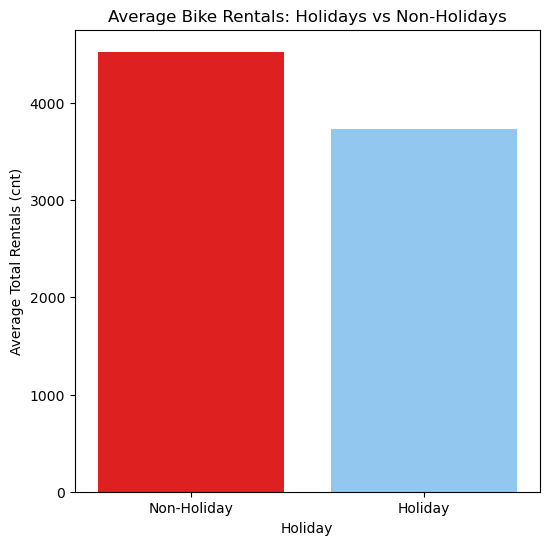

In [26]:
max_bar = np.argmax(holiday_stats['avg_total_rentals'])
colors = ['#FF0000' if i == max_bar else '#82CAFF' for i in range(len(holiday_stats))]
plt.figure(figsize=(6, 6))
sns.barplot(x='holiday', y='avg_total_rentals', data=holiday_stats, palette=colors)
plt.title('Average Bike Rentals: Holidays vs Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Total Rentals (cnt)')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.show()

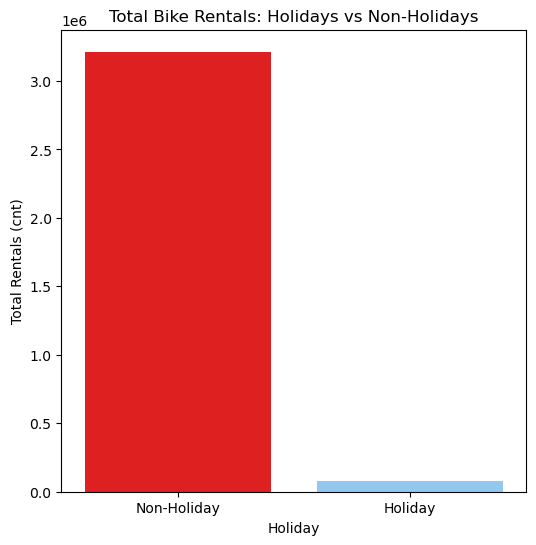

In [27]:
max_bar = np.argmax(holiday_stats['total_rentals'])
colors = ['#FF0000' if i == max_bar else '#82CAFF' for i in range(len(holiday_stats))]
plt.figure(figsize=(6, 6))
sns.barplot(x='holiday', y='total_rentals', data=holiday_stats, palette=colors)
plt.title('Total Bike Rentals: Holidays vs Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Total Rentals (cnt)')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.show()

In [28]:
non_holiday_rentals = holiday_stats[holiday_stats['holiday'] == 0]['total_rentals'].values[0]
holiday_rentals = holiday_stats[holiday_stats['holiday'] == 1]['total_rentals'].values[0]

In [29]:
print(f'Total bike rentals on non-holidays\t: {non_holiday_rentals}')
print(f'Total bike rentals on holidays\t\t: {holiday_rentals}')

if holiday_rentals > non_holiday_rentals:
    result = 'More bikes were rented on holidays compared to non-holidays.'
else:
    result = 'More bikes were rented on non-holidays compared to holidays.'

print(f'Result\t: {result}')

Total bike rentals on non-holidays	: 3214244
Total bike rentals on holidays		: 78435
Result	: More bikes were rented on non-holidays compared to holidays.


### Pertanyaan 2: Berapa perbedaan jumlah penggunaan sepeda pada setiap musim?

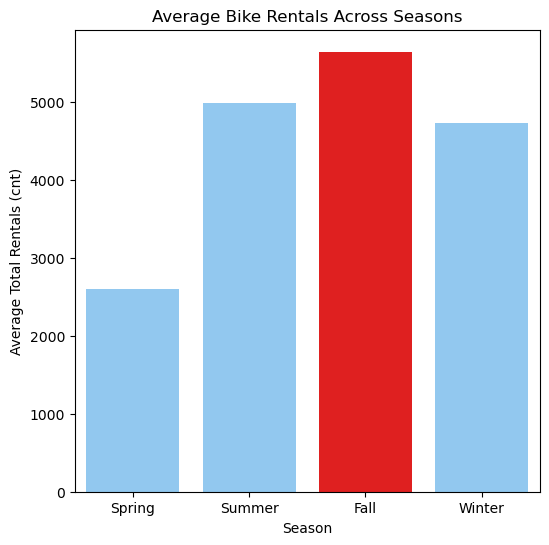

In [30]:
max_bar = np.argmax(season_stats['avg_total_rentals'])
colors = ['#FF0000' if i == max_bar else '#82CAFF' for i in range(len(season_stats))]
plt.figure(figsize=(6, 6))
sns.barplot(x='season', y='avg_total_rentals', data=season_stats, palette= colors)
plt.title('Average Bike Rentals Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Total Rentals (cnt)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

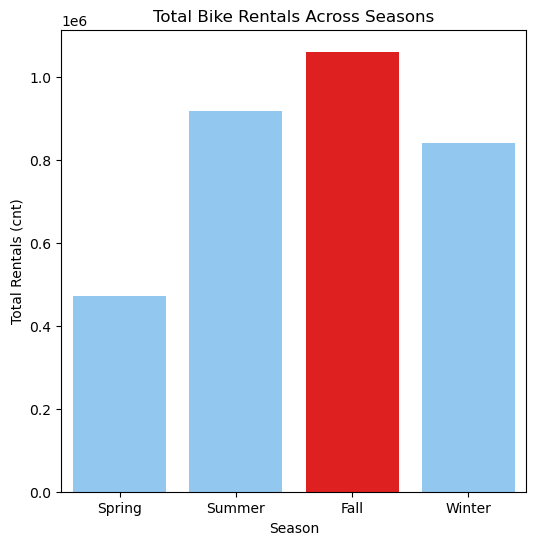

In [31]:
max_bar = np.argmax(season_stats['total_rentals'])
colors = ['#FF0000' if i == max_bar else '#82CAFF' for i in range(len(season_stats))]
plt.figure(figsize=(6, 6))
sns.barplot(x='season', y='total_rentals', data=season_stats, palette=colors)
plt.title('Total Bike Rentals Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total Rentals (cnt)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

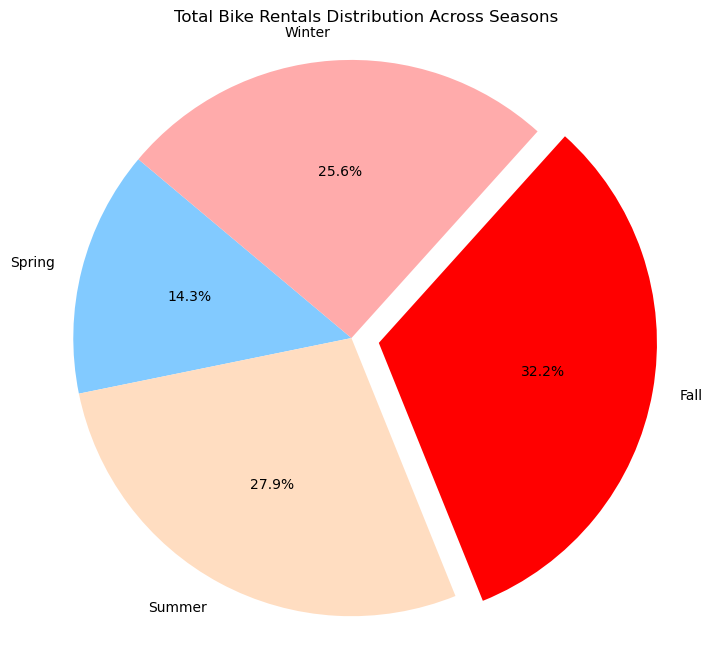

In [32]:
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
total_rentals_values = season_stats['total_rentals']
plt.figure(figsize=(8, 8))
explode = (0, 0, 0.1, 0)
plt.pie(total_rentals_values, labels=season_labels, autopct='%1.1f%%', startangle=140, colors=['#82CAFF', '#FFDDC1', '#FF0000', '#FFABAB',], explode=explode)
plt.title('Total Bike Rentals Distribution Across Seasons')
plt.axis('equal')
plt.show()

### Pertanyaan 3: Pada bulan manakah penggunaan sepeda mencapai puncaknya?

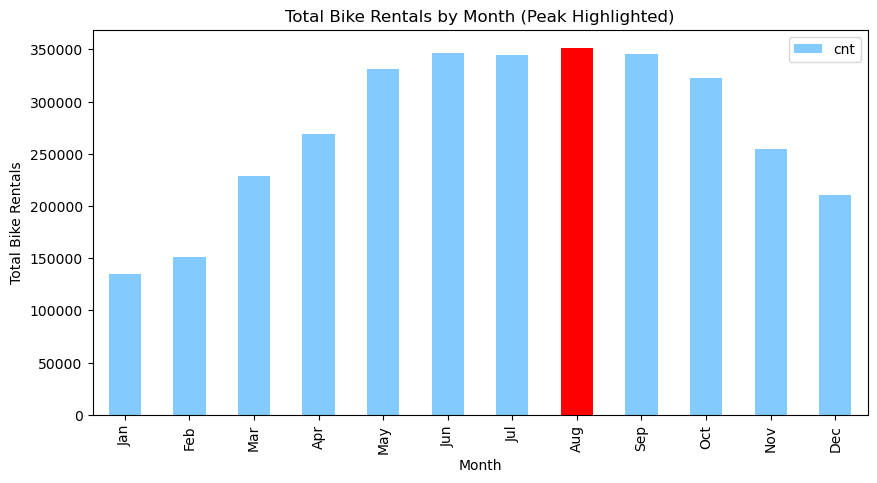

In [33]:
month_count = day_df.groupby('mnth')['cnt'].sum().reset_index()
max_bar = month_count['cnt'].idxmax()
colors = ['#FF0000' if i == max_bar else '#82CAFF' for i in range(len(month_count))]

month_count.plot(
    x="mnth", y="cnt", kind="bar", figsize=(10, 5), 
    color=colors, xlabel="Month", ylabel="Total Bike Rentals",
    title="Total Bike Rentals by Month (Peak Highlighted)"
)

plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


**Insight:**
- Bike use is much more likely on weekdays, while only a few users use bike on holidays
- Fall has the highest proportion of bike rentals, accounting for 32.2% of the total. But that bike usage drops significantly during Spring, and it has the lowest proportion of bike rentals at 14.3%
- Bike rentals are in high demand from June to September and peaking in August. But it gradually decreases as October approaches, with the lowest activity during winter.

## Analisis Lanjutan (Opsional)

## Conclusion

- Bike Rentals peak during Fall and Summer, with the indicates that users enjoy biking during the cool weather of fall and the mild conditions of spring do not attract as many riders. Users also prefer to use bikes on weekdays as transportation for work or other weekday activities, rather than for holidays activities.